# Create a time-of-flight lookup table for TBL

In [1]:
import scipp as sc
from ess.reduce import time_of_flight
from ess.reduce.nexus.types import AnyRun

## Setting up the workflow

In [2]:
source_position = sc.vector([0, 0, 0], unit='m')

wf = time_of_flight.TofLookupTableWorkflow()
wf[time_of_flight.DiskChoppers[AnyRun]] = {}
wf[time_of_flight.SourcePosition] = source_position
wf[time_of_flight.NumberOfSimulatedNeutrons] = 200_000  # Increase this number for more reliable results
wf[time_of_flight.SimulationSeed] = 1234
wf[time_of_flight.PulseStride] = 1
wf[time_of_flight.LtotalRange] = sc.scalar(25.0, unit="m"), sc.scalar(35.0, unit="m")
wf[time_of_flight.DistanceResolution] = sc.scalar(0.1, unit="m")
wf[time_of_flight.TimeResolution] = sc.scalar(250.0, unit='us')
wf[time_of_flight.LookupTableRelativeErrorThreshold] = 1.0

## Compute the table

In [3]:
table = wf.compute(time_of_flight.TimeOfFlightLookupTable)
table

TofLookupTable(array=<scipp.DataArray>
Dimensions: Sizes[distance:105, event_time_offset:287, ]
Coordinates:
* distance                  float64              [m]  (distance)  [24.8, 24.9, ..., 35.1, 35.2]
* event_time_offset         float64            [µs]  (event_time_offset)  [0, 249.75, ..., 71178.8, 71428.6]
Data:
                            float64            [µs]  (distance, event_time_offset)  [69506.3, 69533.7, ..., 73457.6, 74192.2]  [783094, 991606, ..., 2.70451e+08, 3.21249e+08]

, pulse_period=<scipp.Variable> ()    float64            [µs]  71428.6, pulse_stride=1, distance_resolution=<scipp.Variable> ()    float64              [m]  0.1, time_resolution=<scipp.Variable> ()    float64            [µs]  249.75, choppers=None)

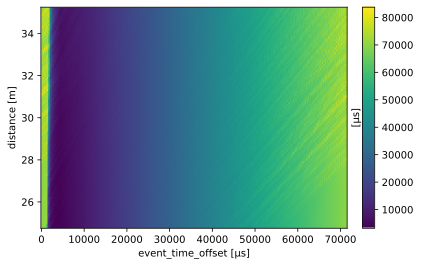

In [4]:
table.plot()

## Save to file

In [5]:
# Save chopper metadata
# Write to file
table.save_hdf5('TBL-tof-lookup-table-no-choppers.h5')

Writing type '<class 'NoneType'>' to HDF5 not implemented, skipping.
